In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.cm as cm

In [3]:
data = pd.read_csv('incercare.csv')
print(data.shape)
data.head()

(2922, 170)


,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.000000,0.410959,0.142420,1.0,0.0,0.0,0.0,0.555556,0.500,0.637681,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.048246,1.0,1.0,0.0,0.0,0.444444,0.625,0.644928,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.205479,0.060609,1.0,0.0,0.0,0.0,0.555556,0.625,0.623188,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.246575,0.046087,1.0,1.0,0.0,0.0,0.666667,0.500,0.695652,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.235294,0.181507,0.058566,1.0,0.0,0.0,0.0,0.444444,0.500,0.905797,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
X = data.copy()
X = data.drop(["SalePrice"], axis='columns')
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical:", cat_cols)
print("Numeric:", num_cols)

Categorical: []
Numeric: ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Street', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Fence', 'Misc Val', 'Mo Sold', 'Yr Sold', 'HasFence', 'GrLivArea_winsor', 'avg_price_at_neighborhood', 'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 

In [6]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[num_cols])
X_scaled.shape

(2922, 169)

In [7]:
pca = PCA(n_components=0.98)
X_pca = pca.fit_transform(X_scaled)

print("New shape:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))

New shape: (2922, 87)
Explained variance ratio: [0.15758532 0.08662478 0.0593984  0.04565257 0.03938193 0.03599502
 0.03331335 0.03198692 0.03045699 0.02807989 0.02591116 0.02545895
 0.0231842  0.02094069 0.01989461 0.0183666  0.01704934 0.01530546
 0.01371091 0.01340341 0.01232185 0.01099013 0.01053446 0.00986475
 0.00939736 0.00847877 0.00765202 0.0075877  0.00719628 0.00713802
 0.00702233 0.00655594 0.00590456 0.00562394 0.0055746  0.00508097
 0.00499681 0.00481441 0.00465925 0.00432776 0.00418664 0.00409714
 0.00405616 0.0038519  0.00371694 0.00367409 0.00351128 0.00342355
 0.00338239 0.0032987  0.00305044 0.00282437 0.00259957 0.00245167
 0.0023136  0.0022565  0.0021928  0.00210394 0.0020788  0.00197596
 0.00187353 0.00180364 0.00164324 0.00155383 0.00150874 0.00147291
 0.00145969 0.00139364 0.00132393 0.0012999  0.0012349  0.00117761
 0.00116983 0.0011394  0.00107825 0.00104742 0.00100735 0.0009804
 0.00095178 0.00089421 0.0008903  0.00087001 0.00085524 0.00082821
 0.00077969 0.0

In [10]:
cum = np.cumsum(pca.explained_variance_ratio_)

n_98 = np.argmax(cum >= 0.98) + 1
n_95 = np.argmax(cum >= 0.95) + 1
n_90 = np.argmax(cum >= 0.90) + 1
n_80 = np.argmax(cum >= 0.80) + 1

print("Components for 98% variance:", n_98)
print("Components for 95% variance:", n_95)
print("Components for 90% variance:", n_90)
print("Components for 80% variance:", n_80)


Components for 98% variance: 87
Components for 95% variance: 61
Components for 90% variance: 44
Components for 80% variance: 26


In [11]:
pca_n_95 = PCA(n_components=n_95)
pca_n_90 = PCA(n_components=n_90)
pca_n_80 = PCA(n_components=n_80)

X_pca_95 = pca_n_95.fit_transform(X_scaled)
X_pca_90 = pca_n_90.fit_transform(X_scaled)
X_pca_80 = pca_n_80.fit_transform(X_scaled)

print("Shapes: ", X_pca_95.shape, X_pca_90.shape, X_pca_80.shape)

Shapes:  (2922, 61) (2922, 44) (2922, 26)


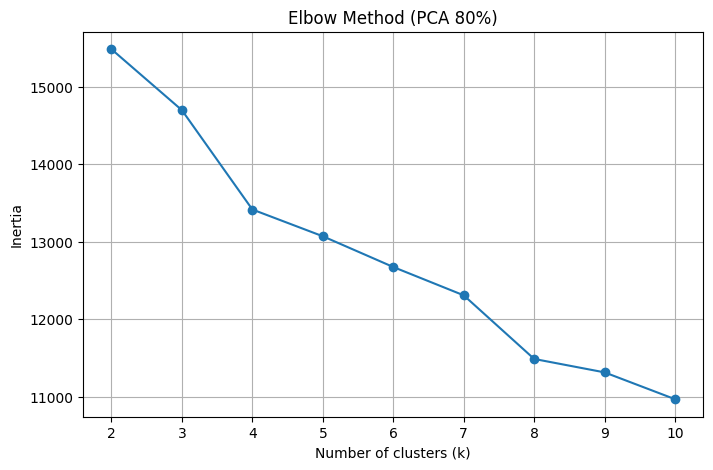

In [12]:
# elbow method for k=range 2-10

inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca_80)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method (PCA 80%)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [13]:
for k, inertia in zip(k_values, inertias):
    print(k, inertia)
drops = []

for i in range(1, len(inertias)):
    drop = inertias[i-1] - inertias[i]
    drops.append(drop)
    print(f"{k_values[i-1]} → {k_values[i]} drop: {drop}")


2 15481.140321526238
3 14694.647531196537
4 13412.943854024992
5 13067.795535461353
6 12671.042083078199
7 12305.652466023896
8 11484.74525256134
9 11311.44463513241
10 10965.230508802038
2 → 3 drop: 786.4927903297012
3 → 4 drop: 1281.7036771715448
4 → 5 drop: 345.1483185636389
5 → 6 drop: 396.7534523831546
6 → 7 drop: 365.389617054303
7 → 8 drop: 820.9072134625549
8 → 9 drop: 173.30061742893122
9 → 10 drop: 346.2141263303711


3->4 is the biggest drop on pca_80 => k=4

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_pca_80)
np.bincount(labels)

array([ 551, 1030,  562,  779])

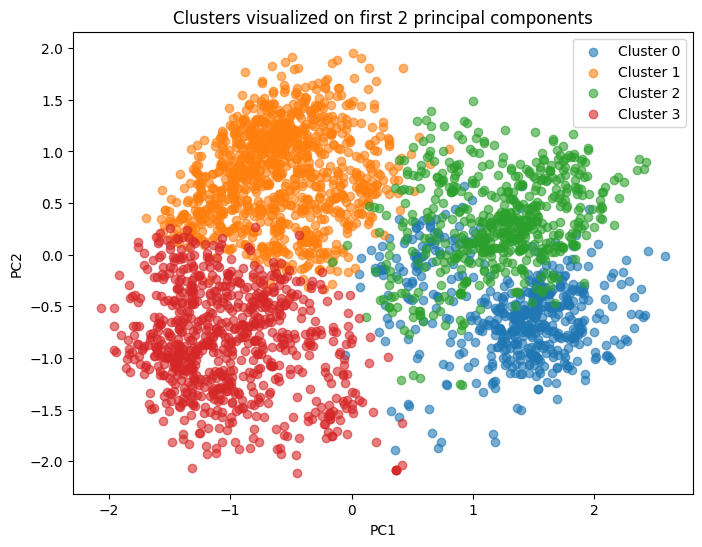

In [16]:
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X_pca_80[labels==cluster, 0], 
        X_pca_80[labels==cluster, 1], 
        label=f"Cluster {cluster}", alpha=0.6
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualized on first 2 principal components")
plt.legend()
plt.show()


In [17]:
score = silhouette_score(X_pca_80, labels)
print("Silhouette score:", score)


Silhouette score: 0.12172498583218638


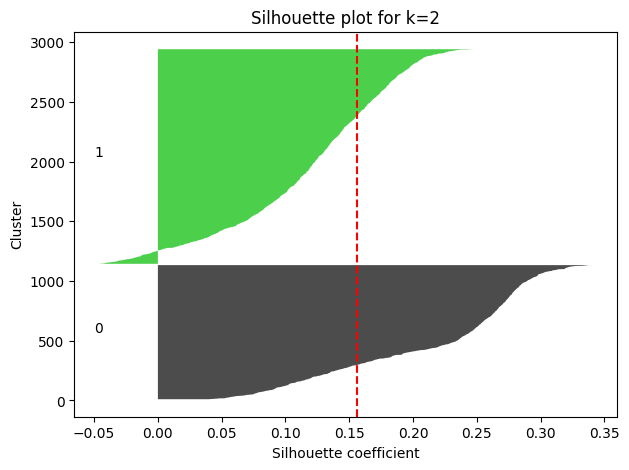

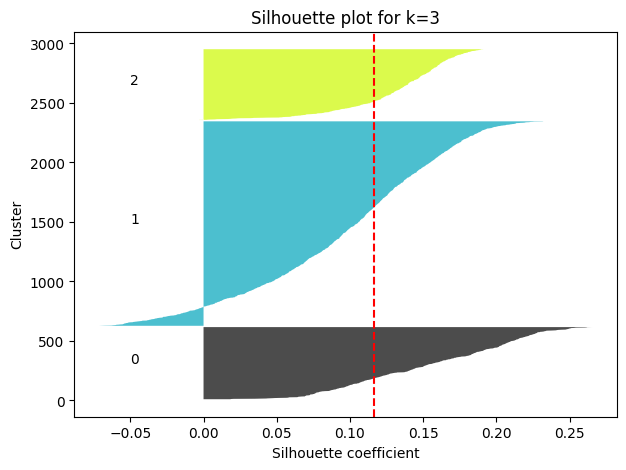

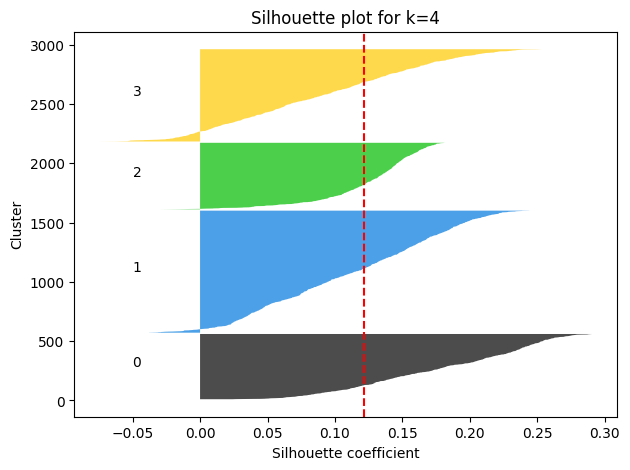

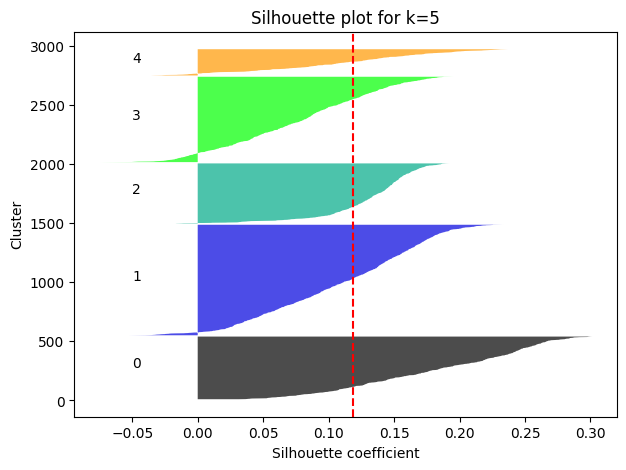

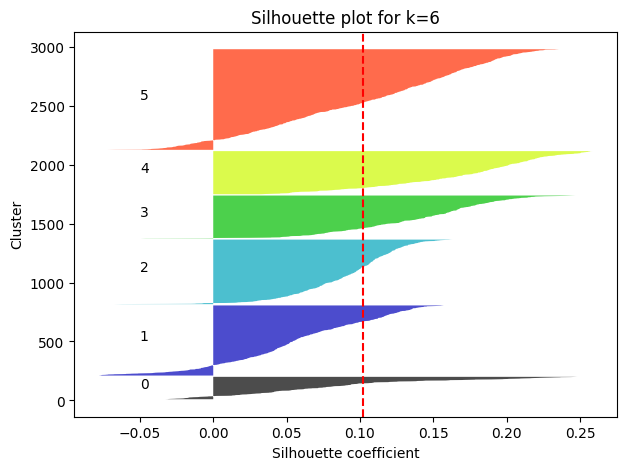

In [20]:
# cluster quality visualization
k_values = [2, 3, 4, 5, 6]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_pca_80)
    
    silhouette_vals = silhouette_samples(X_pca_80, cluster_labels)
    y_lower = 10
    plt.figure(figsize=(7,5))
    
    for i in range(k):
        ith_silhouette = silhouette_vals[cluster_labels == i]
        ith_silhouette.sort()
        y_upper = y_lower + len(ith_silhouette)
        color = cm.nipy_spectral(float(i)/k)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_silhouette, facecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5*len(ith_silhouette), str(i))
        y_lower = y_upper + 10
    plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    plt.title(f"Silhouette plot for k={k}")
    plt.xlabel("Silhouette coefficient")
    plt.ylabel("Cluster")
    plt.show()